In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [57]:
df = pd.read_csv(r"./data.csv")
df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotCases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Area
0,China,110258.0,294.0,4636.0,NaN,102318.0,84.0,3304.0,18.0,77.0,3.0,160000000.0,111163.0,1.439324e+09,Asia
1,USA,80895651.0,45698.0,983486.0,1454.0,54344934.0,207970.0,25567231.0,6693.0,242027.0,2942.0,955780795.0,2859549.0,3.342418e+08,North America
2,India,42957477.0,5921.0,514908.0,288.0,42378721.0,11651.0,63848.0,8944.0,30626.0,367.0,770973356.0,549658.0,1.402643e+09,Asia
3,Brazil,28974315.0,68101.0,651343.0,697.0,26909481.0,99195.0,1413491.0,8318.0,134714.0,3028.0,63776166.0,296522.0,2.150808e+08,South America
4,France,22958320.0,57789.0,139123.0,181.0,21483323.0,118431.0,1335874.0,2484.0,350431.0,2124.0,246629975.0,3764506.0,6.551456e+07,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,Macao,82.0,NaN,NaN,NaN,79.0,NaN,3.0,NaN,123.0,NaN,5318.0,8008.0,6.641020e+05,Asia
217,Samoa,33.0,NaN,NaN,NaN,28.0,NaN,5.0,NaN,164.0,NaN,NaN,NaN,2.006140e+05,Australia/Oceania
218,Vatican City,29.0,NaN,NaN,NaN,28.0,NaN,1.0,NaN,36070.0,NaN,NaN,NaN,8.040000e+02,Europe
219,Vanuatu,18.0,NaN,1.0,NaN,6.0,NaN,11.0,NaN,56.0,3.0,23000.0,72075.0,3.191120e+05,Australia/Oceania


In [58]:
df.describe()

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotCases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
count,2.210000e+02,159.000000,215.000000,106.000000,2.130000e+02,136.000000,2.130000e+02,163.000000,221.000000,215.000000,2.110000e+02,2.110000e+02,2.210000e+02
mean,2.007723e+06,10355.125786,27950.372093,75.679245,1.758068e+06,12880.448529,2.769782e+05,440.871166,124562.524887,1109.832558,2.795136e+07,1.777344e+06,3.567938e+07
std,7.032582e+06,31320.567925,96890.104297,184.294048,5.679424e+06,33129.459288,1.795781e+06,1258.593234,131139.742433,1176.337886,1.012197e+08,3.095758e+06,1.403605e+08
min,1.000000e+01,1.000000,1.000000,1.000000,6.000000e+00,1.000000,1.000000e+00,1.000000,16.000000,2.000000,2.358000e+03,5.111000e+03,8.040000e+02
25%,2.402000e+04,43.000000,268.000000,3.000000,1.566400e+04,69.750000,6.770000e+02,6.000000,10735.000000,168.500000,3.441215e+05,1.371840e+05,6.281990e+05
50%,1.633380e+05,388.000000,2195.000000,13.500000,1.255360e+05,874.000000,9.025000e+03,42.000000,83023.000000,714.000000,2.003534e+06,7.078940e+05,6.540822e+06
75%,1.001754e+06,5352.500000,13736.000000,60.500000,9.182840e+05,7314.000000,8.132500e+04,222.000000,199267.000000,1784.500000,1.165907e+07,1.883654e+06,2.388872e+07
max,8.089565e+07,266838.000000,983486.000000,1454.000000,5.434493e+07,207970.000000,2.556723e+07,8944.000000,696256.000000,6254.000000,9.557808e+08,2.158103e+07,1.439324e+09


## Tình hình Covid thế giới

### Bản đồ thế giới thể hiện thông số ca nhiễm

In [59]:
def plot_map(df, col, pal):
    df = df[df[col]>0]
    fig = px.choropleth(df, locations="Country,Other", locationmode='country names', 
                  color=col, hover_name="Country,Other", 
                  title=col, hover_data=[col], color_continuous_scale=pal)
#     fig.update_layout(coloraxis_showscale=False)
    fig.show()

In [60]:
plot_map(df, 'TotalCases', 'matter')

In [61]:
plot_map(df, 'TotalDeaths', 'Viridis_r')

In [62]:
plot_map(df, 'TotalRecovered', 'inferno_r')

### Biểu đồ quan hệ giữa các thông số ca nhiễm

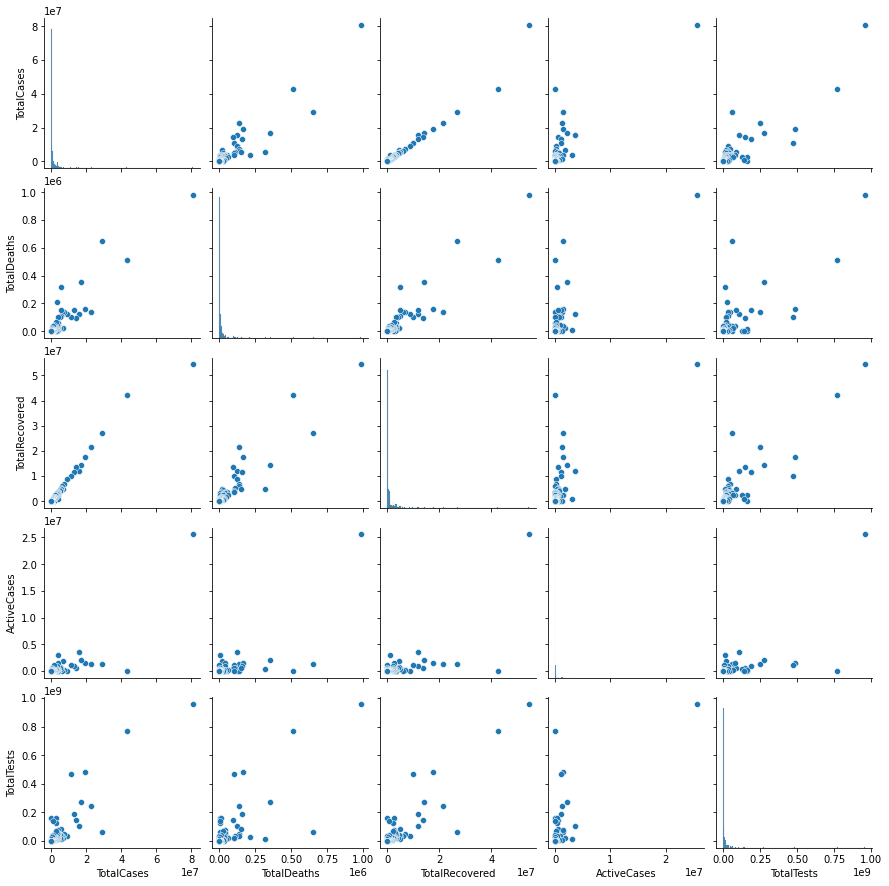

In [63]:
col = ['TotalCases','TotalDeaths','TotalRecovered','ActiveCases', 'TotalTests']
sns.pairplot(df[col]);

### Biểu đồ thể hiện các thông số ca nhiễm của các nước

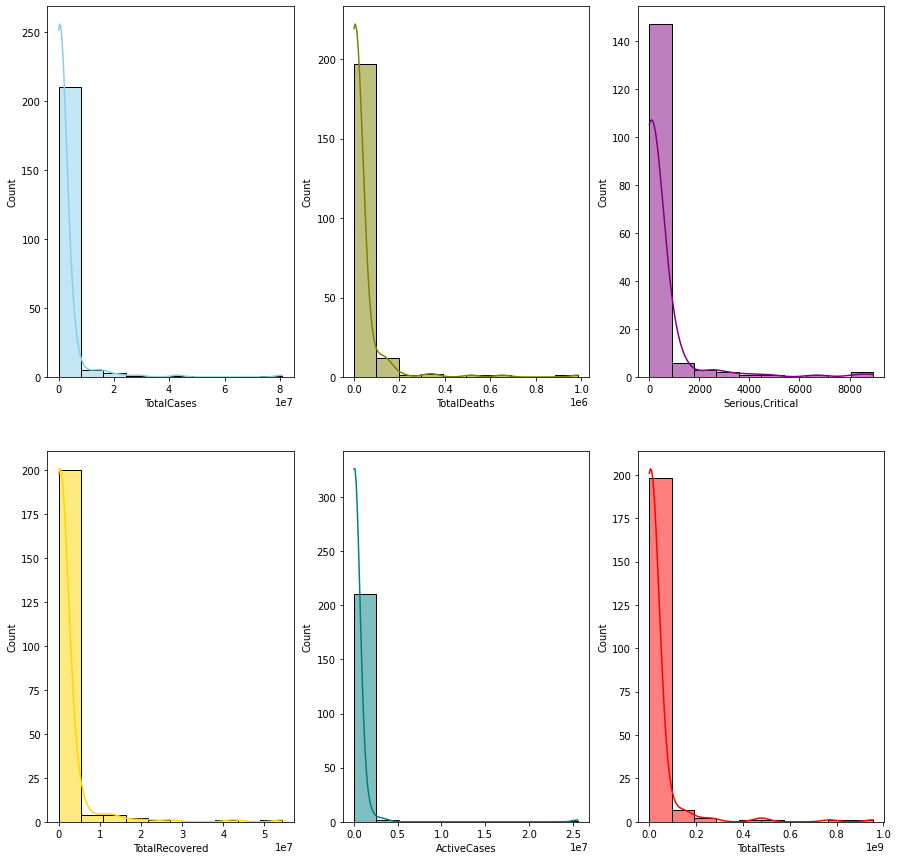

In [64]:
fig, axs = plt.subplots(2, 3, figsize=(15, 15))

sns.histplot(data=df, x="TotalCases", kde=True, color="skyblue", ax=axs[0, 0], bins=10)
sns.histplot(data=df, x="TotalDeaths", kde=True, color="olive", ax=axs[0, 1], bins=10)
sns.histplot(data=df, x="TotalRecovered", kde=True, color="gold", ax=axs[1, 0], bins=10)
sns.histplot(data=df, x="ActiveCases", kde=True, color="teal", ax=axs[1, 1], bins=10)
sns.histplot(data=df, x="Serious,Critical", kde=True, color="purple", ax=axs[0, 2], bins=10)
sns.histplot(data=df, x="TotalTests", kde=True, color="red", ax=axs[1, 2], bins=10);

### Top 10 nước về các thông số

In [65]:
def plot_hbar(df, col, n, hover_data=[]):
    fig = px.bar(df.sort_values(col, na_position="first").tail(10), 
                 x=col, y="Country,Other", color='Area',  
                 text=col, orientation='h', width=700, hover_data=hover_data,
                 color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.update_layout(title=col, xaxis_title="", yaxis_title="", 
                      yaxis_categoryorder = 'total ascending',
                      uniformtext_minsize=8, uniformtext_mode='hide')
    fig.show()

In [66]:
plot_hbar(df, 'TotalCases', 10)

In [67]:
plot_hbar(df, 'TotalDeaths', 10)

In [68]:
plot_hbar(df, 'TotalRecovered', 10)

## Tình hình covid theo khu vực

### Thông số: ca tử vong, ca hồi phục, ca dương tính theo từng khu vực so với tổng số ca nhiễm

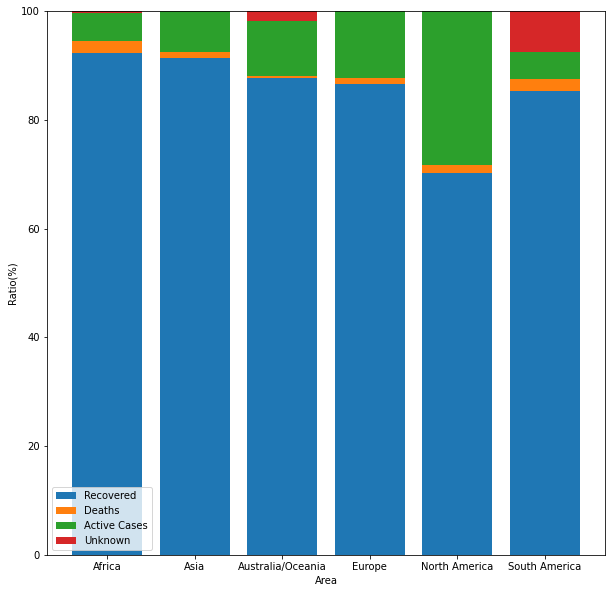

In [69]:
plt.figure(figsize=(10,10))

df_groupedby = df.groupby("Area")[['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases']].sum()

totalDeaths = df_groupedby['TotalDeaths']
totalRecovered = df_groupedby['TotalRecovered']
totalActiveCases = df_groupedby['ActiveCases']
totalCases = df_groupedby['TotalCases']

DeathsRatio = (totalDeaths/totalCases) * 100
RecoveredRatio = (totalRecovered/totalCases) * 100
ActiveCasesRatio = (totalActiveCases/totalCases) * 100
Unknown = 100 - (DeathsRatio+RecoveredRatio+ActiveCasesRatio)

plt.xlabel('Area')
plt.ylabel('Ratio(%)')


p1 = plt.bar(df_groupedby.index,RecoveredRatio,label='Recovered')
p2 = plt.bar(df_groupedby.index,DeathsRatio, bottom = RecoveredRatio, label = 'Deaths')
p3 = plt.bar(df_groupedby.index,ActiveCasesRatio, bottom = RecoveredRatio+DeathsRatio, label = 'Active Cases')
p3 = plt.bar(df_groupedby.index,Unknown, bottom = RecoveredRatio+DeathsRatio+ActiveCasesRatio, label = 'Unknown')
plt.legend();

## Tình hình Covid ở Việt Nam

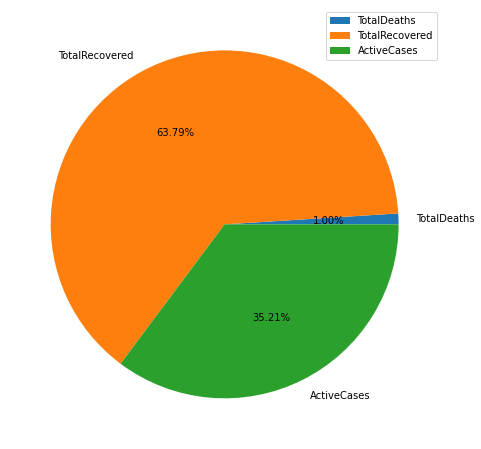

In [70]:
col = ['TotalDeaths','TotalRecovered','ActiveCases']
dataOfVn = df[df['Country,Other']=='Vietnam'][col]
fig = plt.figure(figsize=(8,8))
fig.patch.set_facecolor('white')
plt.pie(dataOfVn.values[0],labels = col,autopct="%1.2f%%")
plt.legend();